In [ ]:
針對分類演算法的比較,可適用於無論數據是否Mix,以及數據無Mix的預測,
但是,數據Mix的預測,必須特別處理:必須合併訓練集與測試集而進行虛擬變數*****

In [1]:
# -*- coding: utf-8 -*-
#-*- coding: cp950 -*-

#import sys
import os as os
import sys

import matplotlib.pyplot as plt
#%matplotlib inline
plt.rcParams['font.sans-serif']=['SimSun'] 
plt.rcParams['axes.unicode_minus']=False
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 11, 8
#plt.style.use('classic')
import pylab as plb 
%matplotlib inline
import seaborn as sns
sns.set()  #***************************

from scipy.optimize import curve_fit
import scipy as sy
import pylab as plb  

import pandas as pd
import numpy as np
#import seaborn as sns
from sklearn.linear_model import LinearRegression
#import sys
#import os as os

from pandas import *

import cv2 as cv
import matplotlib.image as mpimg
from PIL import Image
from scipy import misc
import imageio
from sklearn import model_selection #***************************
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
#from sklearn.model_selection import ShuffleSpli
from sklearn import ensemble, preprocessing, metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1

from sklearn import tree


import xgboost #*************
import xgboost as xgb   #*************
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

from sklearn import datasets

from sklearn import preprocessing, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor

from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVC
from sklearn import svm, preprocessing, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.pipeline import Pipeline

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.datasets import make_classification
from sklearn.datasets import make_gaussian_quantiles


In [2]:
df= pd.read_csv('./data/moneyY2class.csv',index_col=0,encoding='cp950')
print('--------------------------------\n')
print('#The first 5 rows of data \n')
df.head()  

--------------------------------

#The first 5 rows of data 



,LENGTH,LEFT,RIGHT,BOTTOM,TOP,DIAGONAL,money
No,,,,,,,
N001,214.8,131.0,131.1,9.0,9.7,141.0,True
N002,214.6,129.7,129.7,8.1,9.5,141.7,True
N003,214.8,129.7,129.7,8.7,9.6,142.2,True
N004,214.8,129.7,129.6,7.5,10.4,142.0,True
N005,215.0,129.6,129.7,10.4,7.7,141.8,True


In [20]:
df.shape

(200, 7)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, N001 to N200
Data columns (total 7 columns):
LENGTH      200 non-null float64
LEFT        200 non-null float64
RIGHT       200 non-null float64
BOTTOM      200 non-null float64
TOP         200 non-null float64
DIAGONAL    200 non-null float64
money       200 non-null bool
dtypes: bool(1), float64(6)
memory usage: 11.1+ KB


In [4]:
df2=df.dropna()  # df.dropna(axis="rows")
df2.isnull().sum()  

LENGTH      0
LEFT        0
RIGHT       0
BOTTOM      0
TOP         0
DIAGONAL    0
money       0
dtype: int64

In [5]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
LENGTH,200.0,214.8960,0.376554,213.8,214.6,214.90,215.100,216.3
LEFT,200.0,130.1215,0.361026,129.0,129.9,130.20,130.400,131.0
RIGHT,200.0,129.9565,0.404072,129.0,129.7,130.00,130.225,131.1
BOTTOM,200.0,9.4175,1.444603,7.2,8.2,9.10,10.600,12.7
TOP,200.0,10.6505,0.802947,7.7,10.1,10.60,11.200,12.3
DIAGONAL,200.0,140.4835,1.152266,137.8,139.5,140.45,141.500,142.4


In [24]:
len(df2.columns)

7

In [5]:
y= df2.iloc[:,-1]
a=len(df2.columns)-1 
x=df2.iloc[:,:a]

x=pd.get_dummies(x)
x

,LENGTH,LEFT,RIGHT,BOTTOM,TOP,DIAGONAL
No,,,,,,
N001,214.8,131.0,131.1,9.0,9.7,141.0
N002,214.6,129.7,129.7,8.1,9.5,141.7
N003,214.8,129.7,129.7,8.7,9.6,142.2
N004,214.8,129.7,129.6,7.5,10.4,142.0
N005,215.0,129.6,129.7,10.4,7.7,141.8
N006,215.7,130.8,130.5,9.0,10.1,141.4
N007,215.5,129.5,129.7,7.9,9.6,141.6
N008,214.5,129.6,129.2,7.2,10.7,141.7
N009,214.9,129.4,129.7,8.2,11.0,141.9


In [6]:
print('--------------------------------\n')
print('#The Frequency of Target Values \n')
print(y.value_counts())
print('--------------------------------\n')

--------------------------------

#The Frequency of Target Values 

True     100
False    100
Name: money, dtype: int64
--------------------------------



In [13]:
#from sklearn import model_selection

In [7]:
seed = 7
models = []
#models.append(('LR', LogisticRegression()))
models.append(('LogisticR', linear_model.LogisticRegression()))  #solver{'newton-cg’, 'lbfgs’,'liblinear’,‘sag’,‘saga’}, default=’lbfgs’
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', ensemble.RandomForestClassifier()))
models.append(('Bagging', ensemble.BaggingClassifier()))
models.append(('AdaBoost', ensemble.AdaBoostClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GBDT', GradientBoostingClassifier()))
models.append(('XBDT', XGBClassifier()))

print('--------------------------------\n')
print('#The Classification Accuracy for Different Algorithms \n')

results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = " model: %s , accuracy: %5.3f , std: %5.3f " % (name, cv_results.mean(), cv_results.std())
	print(msg)  
 
print('--------------------------------\n')

--------------------------------

#The Classification Accuracy for Different Algorithms 

 model: LogisticR , accuracy: 0.995 , std: 0.015 
 model: LDA , accuracy: 0.995 , std: 0.015 
 model: KNN , accuracy: 0.995 , std: 0.015 
 model: CART , accuracy: 0.970 , std: 0.040 
 model: NB , accuracy: 0.995 , std: 0.015 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. 

 model: SVM , accuracy: 0.000 , std: 0.000 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


 model: RF , accuracy: 0.995 , std: 0.015 
 model: Bagging , accuracy: 0.985 , std: 0.023 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


 model: AdaBoost , accuracy: 0.990 , std: 0.020 
 model: DT , accuracy: 0.970 , std: 0.040 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


 model: GBDT , accuracy: 0.985 , std: 0.023 
 model: XBDT , accuracy: 0.985 , std: 0.023 
--------------------------------



C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [8]:
#pd.DataFrame(msg)
results=pd.DataFrame(results)
Name=pd.DataFrame(names)
resM=pd.DataFrame(results.mean(1))
resM=pd.concat([Name,resM], axis=1)
resM.columns=[['Model','accuracy']]
resM['Rank'] = resM['accuracy'].rank(ascending=False).astype(int)
resM

,Model,accuracy,Rank
0,LogisticR,0.995,3
1,LDA,0.995,3
2,KNN,0.995,3
3,CART,0.970,10
4,NB,0.995,3
5,SVM,0.000,12
6,RF,0.995,3
7,Bagging,0.985,8
8,AdaBoost,0.990,6
9,DT,0.970,10


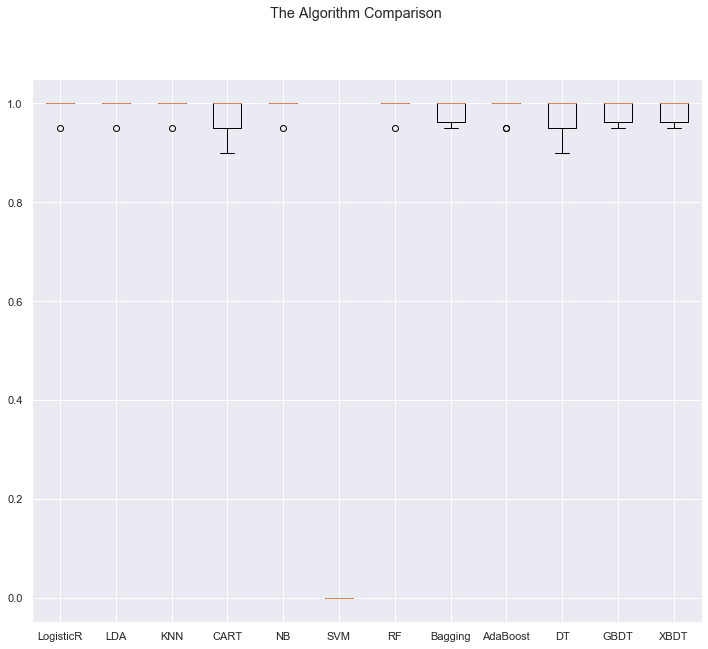

In [9]:
from matplotlib.pylab import rcParams
sns.set(font_scale=1) #****************
rcParams['figure.figsize'] = 12, 10

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('The Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [10]:
#以RF為例
model=ensemble.RandomForestClassifier()
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
cv_results.mean()

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9949999999999999

In [11]:
model.fit(x,y)  
importance=model.feature_importances_
Feature=pd.DataFrame(x.columns, columns=['Feature'])
Importance =pd.DataFrame(np.round(importance,3), columns=['Importance'])  
dtt= Feature.join(Importance)
dtt2= dtt
dtt2['Rank'] = dtt2['Importance'].rank(ascending=False)
dtt2['Rank'] = dtt2['Rank'].astype('int')
dtt2

,Feature,Importance,Rank
0,LENGTH,0.018,6
1,LEFT,0.048,5
2,RIGHT,0.099,3
3,BOTTOM,0.295,2
4,TOP,0.077,4
5,DIAGONAL,0.463,1


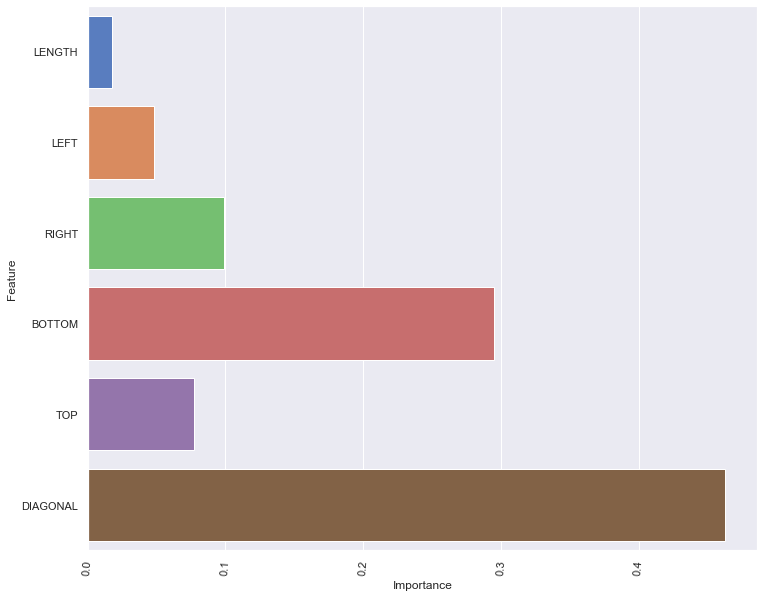

In [12]:
#繪圖
sns.set_style("darkgrid")
x=dtt["Feature"]
y=dtt["Importance"]

bar_plot = sns.barplot(x=y,y=x,palette="muted",order=x.tolist())  #使用排序
plt.xticks(rotation=85)
plt.show()

In [13]:
y= df2.iloc[:,-1]
a=len(df2.columns)-1 
x=df2.iloc[:,:a]

x=pd.get_dummies(x)
x

,LENGTH,LEFT,RIGHT,BOTTOM,TOP,DIAGONAL
No,,,,,,
N001,214.8,131.0,131.1,9.0,9.7,141.0
N002,214.6,129.7,129.7,8.1,9.5,141.7
N003,214.8,129.7,129.7,8.7,9.6,142.2
N004,214.8,129.7,129.6,7.5,10.4,142.0
N005,215.0,129.6,129.7,10.4,7.7,141.8
N006,215.7,130.8,130.5,9.0,10.1,141.4
N007,215.5,129.5,129.7,7.9,9.6,141.6
N008,214.5,129.6,129.2,7.2,10.7,141.7
N009,214.9,129.4,129.7,8.2,11.0,141.9


In [14]:
# 預測性模擬
print('# Predictive simulation \n')
#dtNew = pd.read_csv( "./data/moneyPred.csv", index_col=0)  
dtNew=x.iloc[0:4,]
dtNew

# Predictive simulation 



,LENGTH,LEFT,RIGHT,BOTTOM,TOP,DIAGONAL
No,,,,,,
N001,214.8,131.0,131.1,9.0,9.7,141.0
N002,214.6,129.7,129.7,8.1,9.5,141.7
N003,214.8,129.7,129.7,8.7,9.6,142.2
N004,214.8,129.7,129.6,7.5,10.4,142.0


In [15]:
print('#The prediction of new data ')
pred = model.predict(dtNew) 
pred

#The prediction of new data 


array([ True,  True,  True,  True])

In [16]:
pDt = dtNew
pDt[df2.columns[-1]]=pred  #************************

print('#The Forecast results')
round(pDt,3) 

#The Forecast results


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,LENGTH,LEFT,RIGHT,BOTTOM,TOP,DIAGONAL,money
No,,,,,,,
N001,214.8,131.0,131.1,9.0,9.7,141.0,True
N002,214.6,129.7,129.7,8.1,9.5,141.7,True
N003,214.8,129.7,129.7,8.7,9.6,142.2,True
N004,214.8,129.7,129.6,7.5,10.4,142.0,True
